In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
from sklearn.decomposition import PCA
import umap

In [ ]:


# path_to_SNP_genotype_matrix  = '/home/yiw021/ps2/ps2_pca.genotypes.tab'
# mat = np.loadtxt(path_to_SNP_genotype_matrix)
# pca = PCA(n_components=2)
#pca_fit = pca.fit(mat.transpose())
#pca_projected_mat = pca.transform(mat.transpose())
#np.savetxt('/home/yiw021/ps2/ps2_pca.projection.txt',pca_projected_mat)

### PCA analysis

In [3]:
genotype_data = np.loadtxt('./genotype_matrix.csv',delimiter=',')

In [4]:
genotype_data.shape

(43836, 2504)

In [5]:
pca = PCA(n_components=100)

In [6]:
data_transpose = genotype_data.transpose()

In [7]:
pca_fit = pca.fit(data_transpose)

In [8]:
pca_projected_mat = pca.transform(data_transpose)

In [9]:
pca_projected_mat.shape

(2504, 100)

In [10]:
np.save('./PCA_top100.npy',pca_projected_mat)

In [14]:
mat.shape

(2504, 100)

In [11]:
!du -h *

2.0M	PCA_top100.npy
512	README.md
125M	df_vcf_filt_ld.csv
83M	df_vcf_filt_ld_simple.csv
82M	genotype_matrix.csv
82M	genotype_matrix_1.csv
57K	pca_umap_analysis.ipynb
8.5K	test.csv
8.5K	test_simplified.csv


In [15]:
pop_to_color = {"ACB": "blue", "ASW": "blue", "BEB": "blue", 
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green",
                "CEU": "yellow", "ESN": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "ITU": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PJL": "purple", "PUR": "purple", "STU": "purple",
                "GIH": "orange", "GWD": "orange",
                "KHV": "red", "LWK": "red","MSL": "red", "YRI": "red",
                "None": "gray"    
               }

In [16]:
sample_to_pop = {}
with open("./df_pop.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

In [17]:
sample_to_pop


{'Sample': 'Population',
 'HG00096': 'GBR',
 'HG00097': 'GBR',
 'HG00099': 'GBR',
 'HG00100': 'GBR',
 'HG00101': 'GBR',
 'HG00102': 'GBR',
 'HG00103': 'GBR',
 'HG00105': 'GBR',
 'HG00106': 'GBR',
 'HG00107': 'GBR',
 'HG00108': 'GBR',
 'HG00109': 'GBR',
 'HG00110': 'GBR',
 'HG00111': 'GBR',
 'HG00112': 'GBR',
 'HG00113': 'GBR',
 'HG00114': 'GBR',
 'HG00115': 'GBR',
 'HG00116': 'GBR',
 'HG00117': 'GBR',
 'HG00118': 'GBR',
 'HG00119': 'GBR',
 'HG00120': 'GBR',
 'HG00121': 'GBR',
 'HG00122': 'GBR',
 'HG00123': 'GBR',
 'HG00125': 'GBR',
 'HG00126': 'GBR',
 'HG00127': 'GBR',
 'HG00128': 'GBR',
 'HG00129': 'GBR',
 'HG00130': 'GBR',
 'HG00131': 'GBR',
 'HG00132': 'GBR',
 'HG00133': 'GBR',
 'HG00136': 'GBR',
 'HG00137': 'GBR',
 'HG00138': 'GBR',
 'HG00139': 'GBR',
 'HG00140': 'GBR',
 'HG00141': 'GBR',
 'HG00142': 'GBR',
 'HG00143': 'GBR',
 'HG00145': 'GBR',
 'HG00146': 'GBR',
 'HG00148': 'GBR',
 'HG00149': 'GBR',
 'HG00150': 'GBR',
 'HG00151': 'GBR',
 'HG00154': 'GBR',
 'HG00155': 'GBR',
 'HG00

In [18]:
if not os.path.exists('./df_pop.csv'):
    samples = []
else: samples = [item.strip() for item in open('./df_pop.csv', "r").readlines()[1:]]
colors = []
for sample in samples:
    sample_population = sample.split(',')[1]
    #pop = sample_to_pop.get(sample_population, "None")
    color = pop_to_color[sample_population]
    colors.append(color)



## Load the top 2 PCs

In [19]:
pc1 = pca_projected_mat[:,0]
pc2 = pca_projected_mat[:,1]



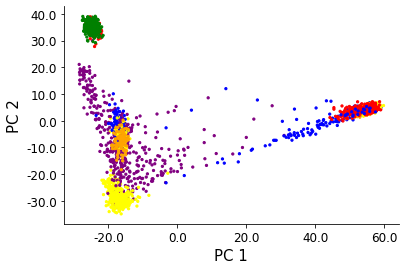

In [22]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();



In [85]:
fig.savefig('./PCA_small_dataset.png')

## Use PC 11,12
### Later principal components do not capture much information
### only PC1,PC2 are most informative of population structure

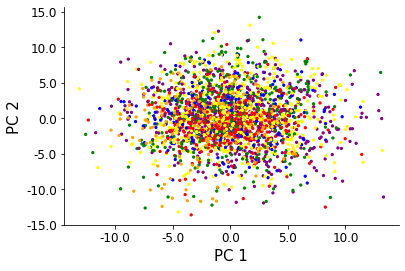

In [33]:
pc1 = pca_projected_mat[:,10]
pc2 = pca_projected_mat[:,11]

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();



### Run U-map

In [34]:
reducer = umap.UMAP()

## Run UMAP on full genotype matrix:

In [36]:
embedding_full = reducer.fit_transform(data_transpose)

In [39]:
embedding_full.shape

(2504, 2)

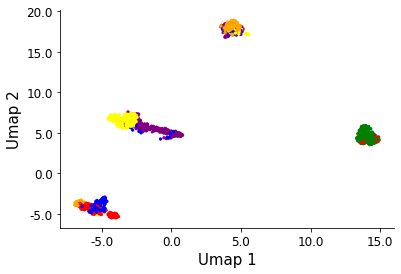

In [40]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embedding_full[:,0],embedding_full[:,1], color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("Umap 1", size=15)
ax.set_ylabel("Umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();


### ABOVE UMAP: SEPARATES MAJOR POPULATION GROUPS BUT DOES NOT SHOW ADMIXTURE PROPERLY
### IT ALSO CLUSTERS MANY POPULATION GROUPS TOGETHER

# Run UMAP with top 15 PCs

In [41]:
top15_PC_matrix = pca_projected_mat[:,0:15]


In [42]:
top15_PC_matrix.shape

(2504, 15)

In [43]:
embedding_PCtop15 = reducer.fit_transform(top15_PC_matrix)

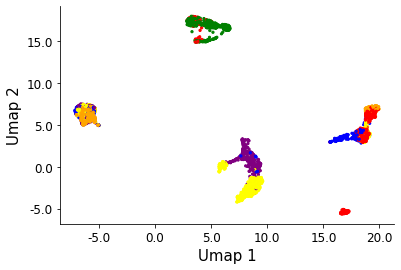

In [44]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embedding_PCtop15[:,0],embedding_PCtop15[:,1], color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("Umap 1", size=15)
ax.set_ylabel("Umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();


### UMAP on top15 PCs evidently caputures more structure. We need to change the color scheme to visualize this better

### Visualize only one continental population: and learn detailed structure